<a href="https://colab.research.google.com/github/DataAnalystPL/Data_analysis/blob/main/Chicago_Taxi_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chicago taxi services in 2022


## 1. Installation and import of Packages

In [1]:
#!nvidia-smi

In [2]:
#!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
#!python rapidsai-csp-utils/colab/pip-install.py

In [3]:
#pip install pyarrow==12.0.0

In [4]:
#pip install cupy-cuda12x

In [5]:
#import cudf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

## 2. Connecting to database

Data source: https://data.cityofchicago.org/Transportation/Taxi-Trips-2022/npd7-ywjz

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
file_path = '/content/drive/MyDrive/Taxi/Taxi_Trips_-_2022_20231107.csv'

In [8]:
#df = cudf.read_csv(file_path)
df = pd.read_csv(file_path)

## 3. Basic EDA

In [9]:
# First 5 rows of the dataset:
df.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,bcfa19f2539021c054809d4c3993d226996ae095,368ce5511598af2cc07efdb68067d381174fdac1d47a28...,01/01/2022 12:00:00 AM,01/01/2022 12:00:00 AM,152.0,0.10,NaN,NaN,NaN,NaN,...,0.0,3.75,Cash,Medallion Leasin,NaN,NaN,NaN,NaN,NaN,NaN
1,2aba69ff015f9ea8e7bff43cab7eddb228f34a12,449fa4909552757130d09d98ebc7770e2dd94579036b0e...,01/01/2022 12:00:00 AM,01/01/2022 12:30:00 AM,2360.0,17.44,NaN,NaN,NaN,8.0,...,5.0,52.75,Cash,Flash Cab,NaN,NaN,NaN,41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
2,54d812a0b88f8f9707825261014b3563a0a60ace,f98ae5e71fdda8806710af321dce58002146886c013f41...,01/01/2022 12:00:00 AM,01/01/2022 12:00:00 AM,536.0,4.83,NaN,NaN,28.0,22.0,...,0.0,14.75,Cash,Globe Taxi,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.922761,-87.699155,POINT (-87.6991553432 41.9227606205)
3,7125b9e03a0f16c2dfb5eaf73ed057dc51eb68ef,8eca35a570101ad24c638f1f43eecce9d0cb7843e13a75...,01/01/2022 12:00:00 AM,01/01/2022 12:15:00 AM,897.0,2.07,NaN,NaN,8.0,32.0,...,1.5,11.25,Cash,Sun Taxi,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.878866,-87.625192,POINT (-87.6251921424 41.8788655841)
4,f1a650ee419b4e52d766432e6f86eca3457bfb37,e2d8418fcdb061eee0a4318fba0a6a1200aaff0143feb0...,01/01/2022 12:00:00 AM,01/01/2022 12:30:00 AM,2200.0,2.48,NaN,NaN,8.0,32.0,...,0.0,11.50,Mobile,Chicago Independents,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.878866,-87.625192,POINT (-87.6251921424 41.8788655841)


In [10]:
df.shape

(6382425, 23)

In [11]:
# Summary statistics
df.describe(datetime_is_numeric=True)

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,6.380960e+06,6.382369e+06,2.623831e+06,2.675331e+06,5.868572e+06,5.748741e+06,6.378889e+06,6.378889e+06,6.378889e+06,6.378889e+06,6.378889e+06,5.870874e+06,5.870874e+06,5.784494e+06,5.784494e+06
mean,1.198209e+03,6.185569e+00,1.703147e+10,1.703141e+10,3.235048e+01,2.584317e+01,2.172931e+01,2.754555e+00,2.128382e-02,2.163036e+00,2.682510e+01,4.189992e+01,-8.768816e+01,4.189471e+01,-8.766249e+01
std,1.895665e+03,8.002858e+00,3.689459e+05,3.457735e+05,2.520305e+01,2.092543e+01,4.941624e+01,4.083892e+00,7.659939e+00,2.175269e+01,5.696460e+01,6.015143e-02,1.046996e-01,5.620670e-02,7.331985e-02
min,0.000000e+00,0.000000e+00,1.703101e+10,1.703101e+10,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.165192e+01,-8.791362e+01,4.166014e+01,-8.791362e+01
25%,4.580000e+02,8.500000e-01,1.703108e+10,1.703108e+10,8.000000e+00,8.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.990000e+00,4.187887e+01,-8.768383e+01,4.187887e+01,-8.766352e+01
50%,8.620000e+02,2.600000e+00,1.703132e+10,1.703132e+10,3.200000e+01,2.800000e+01,1.400000e+01,9.200000e-01,0.000000e+00,0.000000e+00,1.700000e+01,4.189322e+01,-8.763331e+01,4.189251e+01,-8.763331e+01
75%,1.620000e+03,1.110000e+01,1.703184e+10,1.703184e+10,4.400000e+01,3.200000e+01,3.325000e+01,4.000000e+00,0.000000e+00,2.000000e+00,4.050000e+01,4.194423e+01,-8.762519e+01,4.192269e+01,-8.762519e+01
max,8.634100e+04,2.967540e+03,1.703198e+10,1.703198e+10,7.700000e+01,7.700000e+01,9.999750e+03,4.960000e+02,6.666660e+03,8.888880e+03,9.999750e+03,4.202122e+01,-8.753071e+01,4.202122e+01,-8.753139e+01


In [12]:
# Data types of each column
df.dtypes

Trip ID                        object
Taxi ID                        object
Trip Start Timestamp           object
Trip End Timestamp             object
Trip Seconds                  float64
Trip Miles                    float64
Pickup Census Tract           float64
Dropoff Census Tract          float64
Pickup Community Area         float64
Dropoff Community Area        float64
Fare                          float64
Tips                          float64
Tolls                         float64
Extras                        float64
Trip Total                    float64
Payment Type                   object
Company                        object
Pickup Centroid Latitude      float64
Pickup Centroid Longitude     float64
Pickup Centroid Location       object
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
Dropoff Centroid  Location     object
dtype: object

In [13]:
# Number of missing values in each column
df.isnull().sum()

Trip ID                             0
Taxi ID                           354
Trip Start Timestamp                0
Trip End Timestamp                212
Trip Seconds                     1465
Trip Miles                         56
Pickup Census Tract           3758594
Dropoff Census Tract          3707094
Pickup Community Area          513853
Dropoff Community Area         633684
Fare                             3536
Tips                             3536
Tolls                            3536
Extras                           3536
Trip Total                       3536
Payment Type                        0
Company                             0
Pickup Centroid Latitude       511551
Pickup Centroid Longitude      511551
Pickup Centroid Location       511551
Dropoff Centroid Latitude      597931
Dropoff Centroid Longitude     597931
Dropoff Centroid  Location     597931
dtype: int64

## 4. Cleaning Dataset of missing values

In [14]:
# Droping empty and columns with 0 values or useless
col_to_drop = ["Pickup Census Tract", "Dropoff Census Tract", "Pickup Centroid Location" , "Dropoff Centroid  Location"]
df.drop(col_to_drop, axis=1, inplace=True)

In [15]:
columns_to_clean = ['Taxi ID', 'Trip End Timestamp', 'Trip Seconds', 'Trip Miles', 'Fare', 'Tips', 'Extras',
                    'Trip Total', 'Tolls', 'Pickup Community Area', 'Dropoff Community Area', 'Pickup Centroid Latitude',
                    'Pickup Centroid Longitude', 'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude']
# Droping empty rows
for column in columns_to_clean:
  df.dropna(subset=column, inplace=True)

In [16]:
df.isnull().sum()

Trip ID                       0
Taxi ID                       0
Trip Start Timestamp          0
Trip End Timestamp            0
Trip Seconds                  0
Trip Miles                    0
Pickup Community Area         0
Dropoff Community Area        0
Fare                          0
Tips                          0
Tolls                         0
Extras                        0
Trip Total                    0
Payment Type                  0
Company                       0
Pickup Centroid Latitude      0
Pickup Centroid Longitude     0
Dropoff Centroid Latitude     0
Dropoff Centroid Longitude    0
dtype: int64

**According to dataset description empty pickup and drop-off points mean that the points were outside Chicago borders.**

### 5. Cleaning timestamps

In [17]:
#df['Trip Start Timestamp'] = cudf.to_datetime(df['Trip Start Timestamp'], format='%m/%d/%Y %I:%M:%S %p').dt.strftime('%Y-%m-%d %H:%M:%S')
#df['Trip End Timestamp'] = cudf.to_datetime(df['Trip End Timestamp'], format='%m/%d/%Y %I:%M:%S %p').dt.strftime('%Y-%m-%d %H:%M:%S')
df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'], format='%m/%d/%Y %I:%M:%S %p').dt.strftime('%Y-%m-%d %H:%M:%S')
df['Trip End Timestamp'] = pd.to_datetime(df['Trip End Timestamp'], format='%m/%d/%Y %I:%M:%S %p').dt.strftime('%Y-%m-%d %H:%M:%S')

## 5. EDA

In [18]:
import matplotlib
matplotlib.style.use('ggplot')

In [19]:
palette = ['#367C6E', '#EECD69', '#F3AC59', '#954C41', '#E56F3E']

In [20]:
#How many taxi companies do we have in the database?
#taxi_companies = df['Company'].unique().to_pandas()
taxi_companies = df['Company'].unique()

In [21]:
print(taxi_companies)

['Globe Taxi' 'Sun Taxi' 'Chicago Independents'
 'Taxi Affiliation Services' 'Flash Cab' 'Taxicab Insurance Agency, LLC'
 'Choice Taxi Association' 'City Service' '24 Seven Taxi'
 'Medallion Leasin' 'Patriot Taxi Dba Peace Taxi Associat'
 'Top Cab Affiliation' 'Blue Ribbon Taxi Association Inc.' 'Setare Inc'
 '312 Medallion Management Corp' 'U Taxicab' 'KOAM Taxi Association'
 'Chicago Taxicab' 'Petani Cab Corp' '2733 - 74600 Benny Jona'
 '3620 - 52292 David K. Cab Corp.' 'Metro Jet Taxi A.'
 '3556 - 36214 RC Andrews Cab' '4053 - 40193 Adwar H. Nikola'
 'Taxicab Insurance Agency Llc' 'Chicago Carriage Cab Corp' 'Top Cab'
 '6574 - Babylon Express Inc.' 'Nova Taxi Affiliation Llc'
 'Blue Ribbon Taxi Association' 'Star North Taxi Management Llc'
 'Koam Taxi Association' '5062 - 34841 Sam Mestas' '5 Star Taxi'
 'Leonard Cab Co']


Some Companies are doubled!

In [22]:
df['Company'] = df['Company'].replace('KOAM Taxi Association','Koam Taxi Association')

In [23]:
df['Company'] = df['Company'].replace('Taxicab Insurance Agency, LLC', 'Taxicab Insurance Agency Llc')

In [24]:
#taxi_companies = df['Company'].unique().to_pandas()
#Let's check again how many unique taxis are in database
taxi_companies = df['Company'].unique()

In [25]:
print(f"We have {len(taxi_companies)} taxi companies:")
for row in taxi_companies:
  print("\t- ", row)

We have 33 taxi companies:
	-  Globe Taxi
	-  Sun Taxi
	-  Chicago Independents
	-  Taxi Affiliation Services
	-  Flash Cab
	-  Taxicab Insurance Agency Llc
	-  Choice Taxi Association
	-  City Service
	-  24 Seven Taxi
	-  Medallion Leasin
	-  Patriot Taxi Dba Peace Taxi Associat
	-  Top Cab Affiliation
	-  Blue Ribbon Taxi Association Inc.
	-  Setare Inc
	-  312 Medallion Management Corp
	-  U Taxicab
	-  Koam Taxi Association
	-  Chicago Taxicab
	-  Petani Cab Corp
	-  2733 - 74600 Benny Jona
	-  3620 - 52292 David K. Cab Corp.
	-  Metro Jet Taxi A.
	-  3556 - 36214 RC Andrews Cab
	-  4053 - 40193 Adwar H. Nikola
	-  Chicago Carriage Cab Corp
	-  Top Cab
	-  6574 - Babylon Express Inc.
	-  Nova Taxi Affiliation Llc
	-  Blue Ribbon Taxi Association
	-  Star North Taxi Management Llc
	-  5062 - 34841 Sam Mestas
	-  5 Star Taxi
	-  Leonard Cab Co


In [26]:
#taxi_per_company = df.groupby('Company')['Taxi ID'].nunique().sort_values(ascending=False).to_pandas()
taxi_per_company = df.groupby('Company')['Taxi ID'].nunique().sort_values(ascending=False)
print(taxi_per_company)

Company
Flash Cab                               565
Taxi Affiliation Services               546
Taxicab Insurance Agency Llc            338
5 Star Taxi                             334
Sun Taxi                                312
City Service                            284
Chicago Independents                    196
Medallion Leasin                        145
Blue Ribbon Taxi Association            121
Globe Taxi                              118
Star North Taxi Management Llc          101
Blue Ribbon Taxi Association Inc.        81
Choice Taxi Association                  64
Top Cab Affiliation                      60
24 Seven Taxi                            36
U Taxicab                                32
Chicago Taxicab                          13
Patriot Taxi Dba Peace Taxi Associat     11
312 Medallion Management Corp             9
Koam Taxi Association                     8
Top Cab                                   7
Petani Cab Corp                           5
Leonard Cab Co          

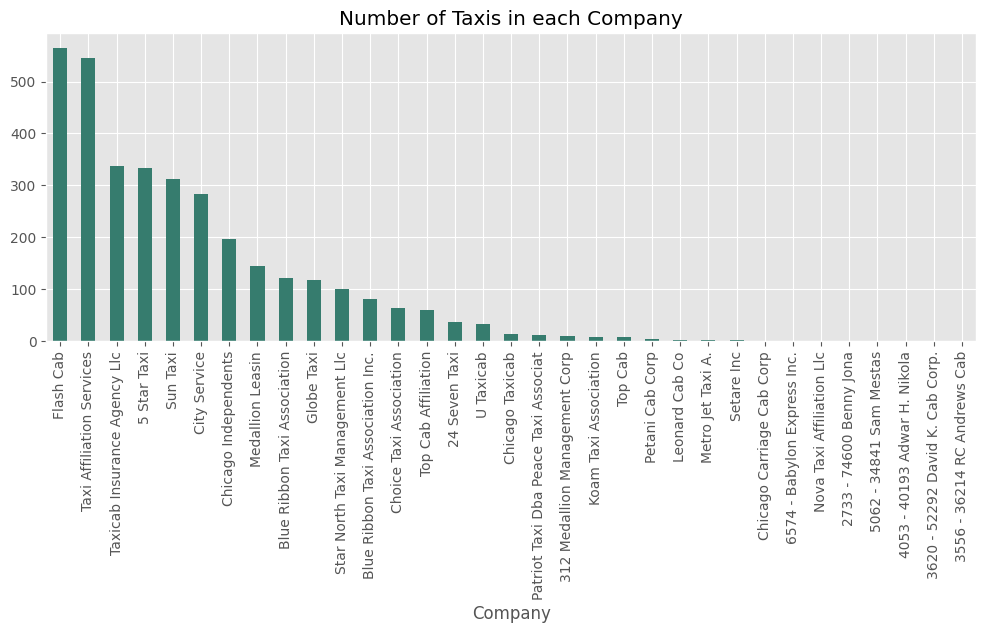

In [27]:
taxi_per_company.plot(kind='bar', figsize=(12,4), title='Number of Taxis in each Company', color=palette[0])
plt.show()

In [28]:
#How many Trips each company made?
#trip_count_by_company = df.groupby('Company').size().sort_values(ascending=False).to_pandas()
trip_count_by_company = df.groupby('Company').size().sort_values(ascending=False)
print(trip_count_by_company)

Company
Flash Cab                               1203412
Taxi Affiliation Services               1200481
Sun Taxi                                 595396
City Service                             510436
Taxicab Insurance Agency Llc             464340
Chicago Independents                     270506
Medallion Leasin                         224482
Globe Taxi                               206103
Blue Ribbon Taxi Association             138554
Star North Taxi Management Llc           127786
5 Star Taxi                              127403
Choice Taxi Association                  106385
Top Cab Affiliation                       78124
24 Seven Taxi                             50822
U Taxicab                                 44828
Blue Ribbon Taxi Association Inc.         32680
Patriot Taxi Dba Peace Taxi Associat      19749
Koam Taxi Association                     17349
Chicago Taxicab                           15983
312 Medallion Management Corp              7418
Setare Inc                      

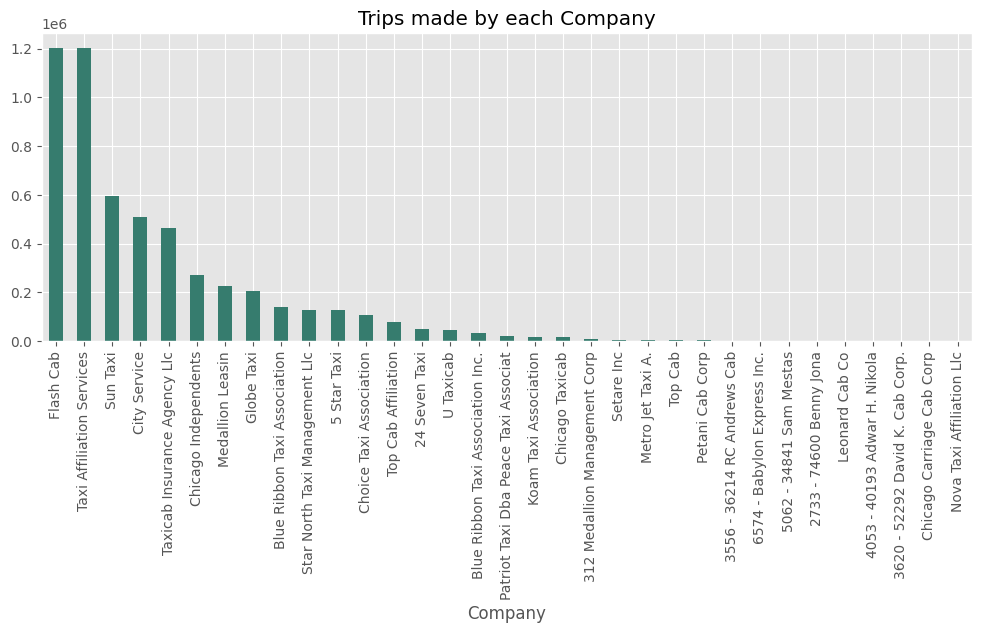

In [29]:
trip_count_by_company.plot(kind='bar', figsize=(12,4), title='Trips made by each Company', color=palette[0])
plt.show()

In [30]:
trip_details_columns = ['Trip Miles', 'Trip Seconds', 'Fare', 'Tips', 'Tolls', 'Extras', 'Trip Total']

Miles made by each Company
Company
Flash Cab                               6806488.19
Taxi Affiliation Services               4577618.50
Sun Taxi                                3334578.69
City Service                            3101633.49
Taxicab Insurance Agency Llc            2694991.98
Chicago Independents                    1649762.81
Medallion Leasin                        1270299.65
Globe Taxi                              1210489.45
Star North Taxi Management Llc           812306.20
5 Star Taxi                              735454.33
Choice Taxi Association                  728147.30
Blue Ribbon Taxi Association             725183.57
Top Cab Affiliation                      490718.70
U Taxicab                                350095.80
24 Seven Taxi                            236310.30
Chicago Taxicab                          105498.54
Blue Ribbon Taxi Association Inc.        103258.40
Koam Taxi Association                     93901.53
Patriot Taxi Dba Peace Taxi Associat      73043

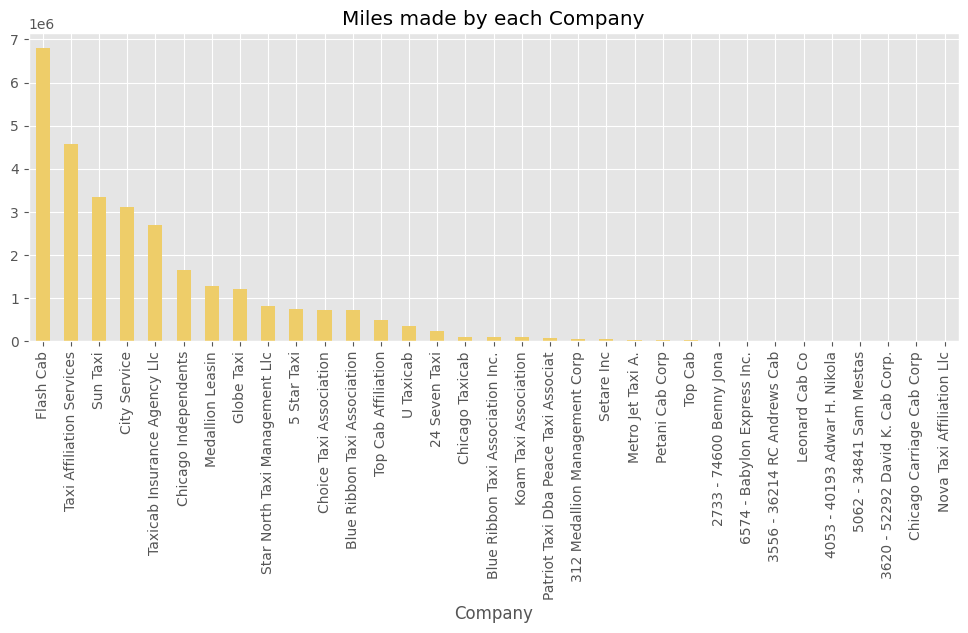

Sum of time in Trip by each Company
Company
Flash Cab                               1.400980e+09
Taxi Affiliation Services               1.294674e+09
Sun Taxi                                6.857697e+08
City Service                            5.639659e+08
Taxicab Insurance Agency Llc            5.099512e+08
Chicago Independents                    3.009520e+08
Medallion Leasin                        2.539913e+08
Globe Taxi                              2.285334e+08
5 Star Taxi                             1.587039e+08
Star North Taxi Management Llc          1.557522e+08
Blue Ribbon Taxi Association            1.495285e+08
Choice Taxi Association                 1.271590e+08
Top Cab Affiliation                     8.903166e+07
U Taxicab                               5.785632e+07
24 Seven Taxi                           4.668943e+07
Blue Ribbon Taxi Association Inc.       2.720364e+07
Patriot Taxi Dba Peace Taxi Associat    2.101466e+07
Chicago Taxicab                         2.050043e+07
Ko

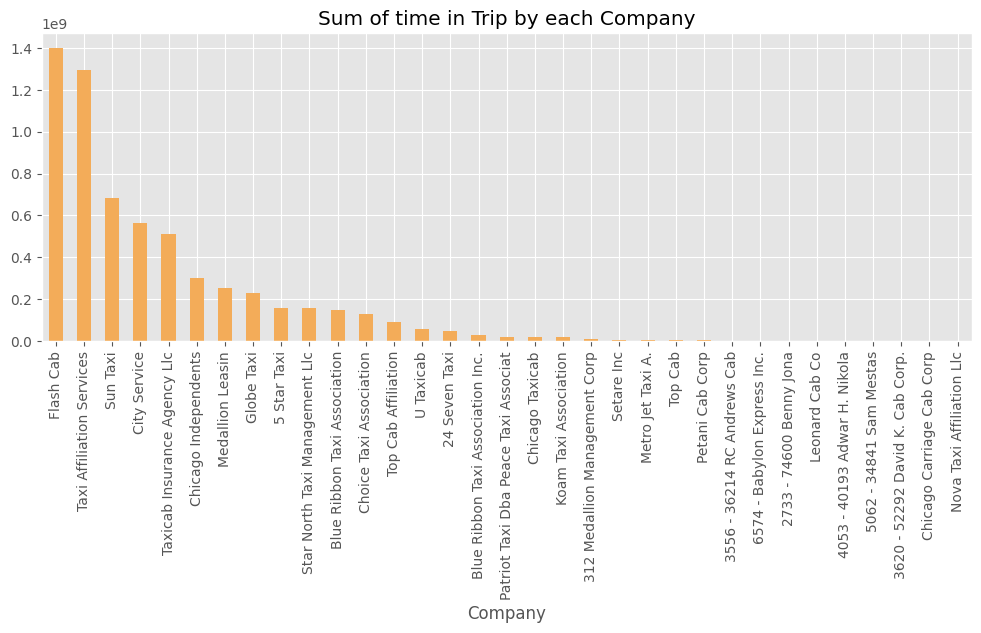

Income from Fare by each Company
Company
Flash Cab                               23832820.53
Taxi Affiliation Services               23403254.25
Sun Taxi                                10976744.50
City Service                             9908774.46
Taxicab Insurance Agency Llc             9193529.84
Chicago Independents                     5263496.83
Medallion Leasin                         4067028.52
Globe Taxi                               3915364.42
5 Star Taxi                              2611547.33
Star North Taxi Management Llc           2544308.40
Blue Ribbon Taxi Association             2441627.98
Choice Taxi Association                  2193534.59
Metro Jet Taxi A.                        1623912.20
Top Cab Affiliation                      1502680.04
U Taxicab                                1027051.45
24 Seven Taxi                             813883.88
Blue Ribbon Taxi Association Inc.         494626.87
Chicago Taxicab                           434812.02
Patriot Taxi Dba Peace 

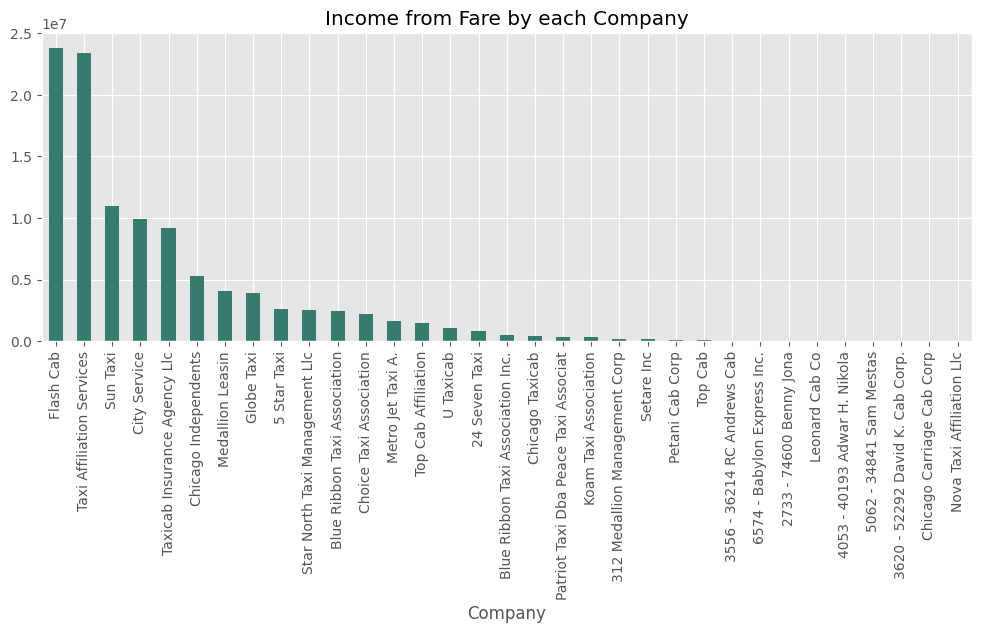

Income from Tips by each Company
Company
Taxi Affiliation Services               2691912.30
Flash Cab                               1790817.17
Sun Taxi                                1770034.90
City Service                            1461147.50
Taxicab Insurance Agency Llc            1427885.17
Chicago Independents                     888679.90
Medallion Leasin                         586983.09
Globe Taxi                               584395.15
Star North Taxi Management Llc           393450.33
Choice Taxi Association                  343259.45
5 Star Taxi                              311968.00
Blue Ribbon Taxi Association             310361.61
Top Cab Affiliation                      234859.29
U Taxicab                                144294.88
24 Seven Taxi                            134200.88
Blue Ribbon Taxi Association Inc.         50714.00
Koam Taxi Association                     50646.40
Chicago Taxicab                           47226.76
312 Medallion Management Corp            

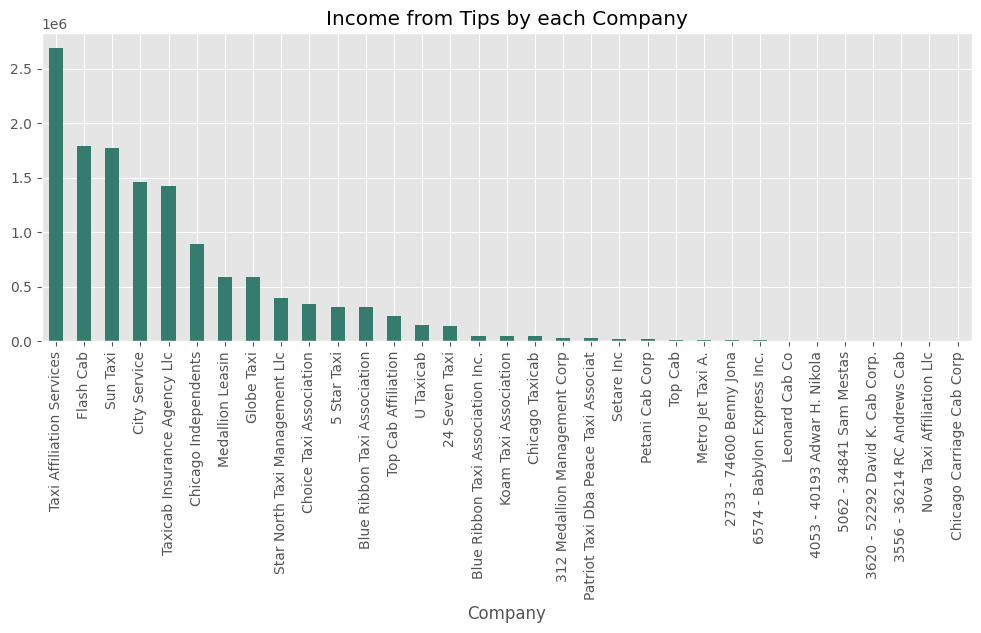

Income from Tolls by each Company
Company
Taxi Affiliation Services               84117.50
Taxicab Insurance Agency Llc             2928.58
Globe Taxi                               2081.88
Chicago Independents                     1625.03
Star North Taxi Management Llc           1443.57
U Taxicab                                1221.58
Medallion Leasin                         1075.19
City Service                              740.84
Sun Taxi                                  518.04
Blue Ribbon Taxi Association              279.58
Choice Taxi Association                   199.50
Top Cab Affiliation                       128.56
Chicago Taxicab                            54.51
Flash Cab                                  39.75
5 Star Taxi                                22.00
Koam Taxi Association                       4.02
Chicago Carriage Cab Corp                   0.00
Petani Cab Corp                             0.00
312 Medallion Management Corp               0.00
Top Cab                    

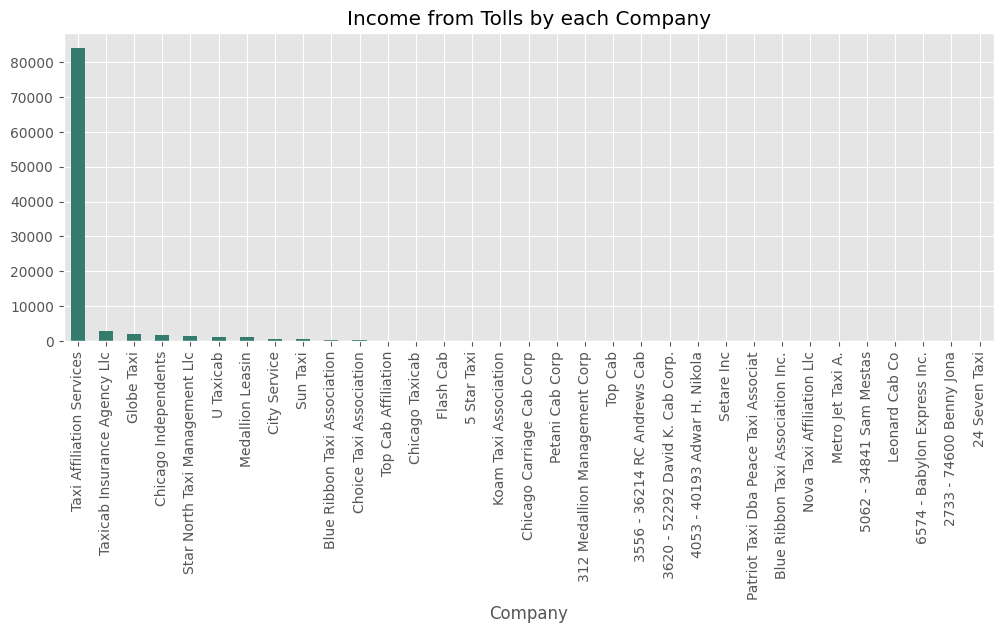

Income from Extras by each Company
Company
Taxi Affiliation Services               2241768.96
Taxicab Insurance Agency Llc             757114.32
Flash Cab                                656977.00
Sun Taxi                                 627166.50
City Service                             564478.05
Chicago Independents                     381386.01
Medallion Leasin                         294363.76
Globe Taxi                               269532.06
Choice Taxi Association                  192996.45
Star North Taxi Management Llc           179336.25
Top Cab Affiliation                      153705.56
5 Star Taxi                              136695.00
Blue Ribbon Taxi Association             117866.91
U Taxicab                                107077.12
24 Seven Taxi                             38882.50
Blue Ribbon Taxi Association Inc.         36775.56
Chicago Taxicab                           29867.71
Koam Taxi Association                     24902.88
312 Medallion Management Corp          

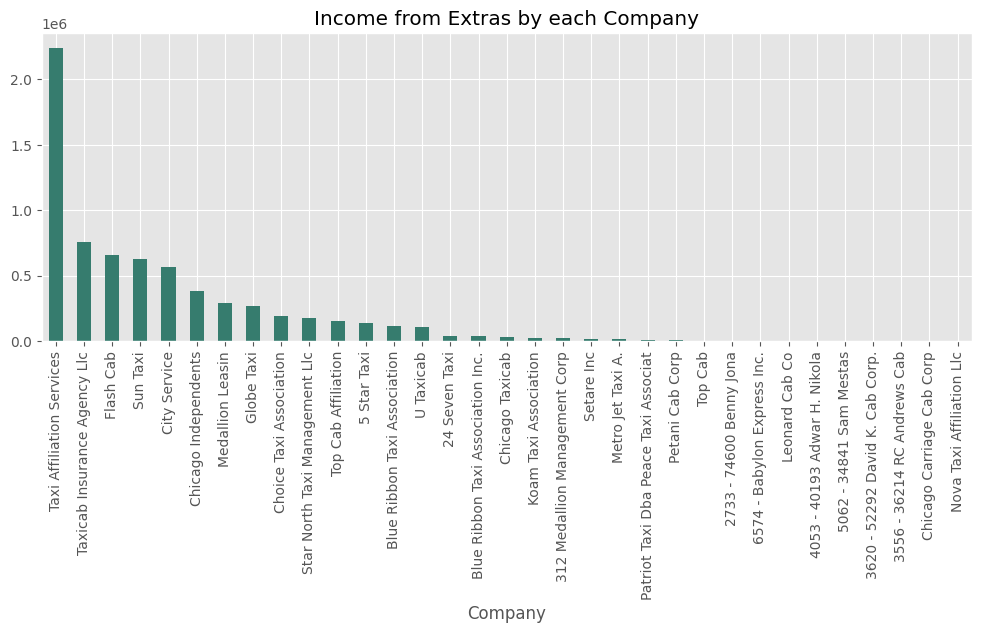

Income from Trip Total by each Company
Company
Taxi Affiliation Services               28421053.61
Flash Cab                               26423953.42
Sun Taxi                                13536992.77
City Service                            12063523.07
Taxicab Insurance Agency Llc            11453843.77
Chicago Independents                     6601477.75
Medallion Leasin                         5007779.61
Globe Taxi                               4818588.00
Star North Taxi Management Llc           3154481.95
5 Star Taxi                              3086535.98
Blue Ribbon Taxi Association             2903840.13
Choice Taxi Association                  2729989.99
Top Cab Affiliation                      1891373.45
Metro Jet Taxi A.                        1649300.71
U Taxicab                                1279645.03
24 Seven Taxi                             998712.51
Blue Ribbon Taxi Association Inc.         582116.43
Chicago Taxicab                           516344.28
Koam Taxi Associa

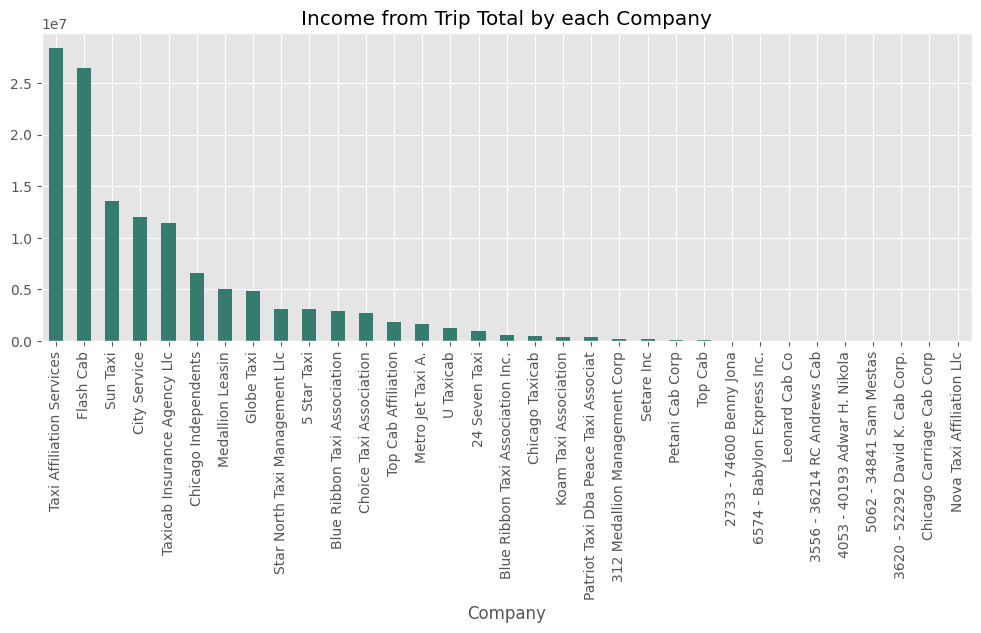

In [31]:
for feat in trip_details_columns:
  #details = df.groupby('Company')[feat].sum().sort_values(ascending=False).to_pandas()
  details = df.groupby('Company')[feat].sum().sort_values(ascending=False)
  if feat == 'Trip Miles':
    print('\033[1mMiles made by each Company\033[0m')
    print(details.round(2))
    details.plot(kind='bar', figsize=(12,4), title='Miles made by each Company', color=palette[1])
    plt.show()
  elif feat == 'Trip Seconds':
    print('\033[1mSum of time in Trip by each Company\033[0m')
    print(details.round(2))
    details.plot(kind='bar', figsize=(12,4), title='Sum of time in Trip by each Company', color=palette[2])
    plt.show()
  else:
    print(f"\033[1mIncome from {feat} by each Company\033[0m")
    print(details.round(2))
    details.plot(kind='bar', figsize=(12,4), title=f'Income from {feat} by each Company', color=palette[0])
    plt.show()


**Observations**


*   Tolls and Extras has probably some outliers
*   There are couple Taxi companies which have only 1 driver
*   Flash Cab and Taxi Affiliation Services are the largest Taxi companies in Chicago



### 2. Taxi Drivers info

In [32]:
#How many taxis do we have in the database and how many trips make each one?
#trip_count_by_taxi = df.groupby(['Taxi ID']).size().sort_values(ascending=False).to_pandas()
trip_count_by_taxi = df.groupby(['Taxi ID']).size().sort_values(ascending=False)

In [33]:
print(f"We have {len(trip_count_by_taxi)} taxis and the most active one made {trip_count_by_taxi.max()} trips")

We have 2886 taxis and the most active one made 9610 trips


Miles made by each Taxi
Taxi ID
da60c0b2a94e4c516b9c9bdaceeb3f17066f98190eb3895010b6071915a64752e5cb1532dc6d36f992a6ed48287e4409110651d140ba63296c1f68f0ed853676    64625.37
a79d72d3d49bed13558577cc0608caf7e8da5b9cee67b608b53567d1be89e0ad257654a59e271e1a0239e5ef4a926668d7edb9e1a798a7b1e6726b64113518c6    62902.90
2981edd199f55bdc8b5ed188de69e9f5d8116ae8d7a434fa0574d57740840e697755e4e77bb4ce8265289b6548d53674a5ac16dde44c3cf653e3ce1c8e064265    53855.10
356744753023949fa63be6a6d7e0aef31f2d50dd3b0258449c6b8b6d277765da6955b1ef88c72ca79a9db0d3c20b162fce7cd9ec113b49da61c12c2c546915d4    52487.02
7e25041185a6cc504dd6e2f71691c595aeae45c4b862473f016bed34ee33e1dc9c74ab26454407ae4794086f7f1bd2e91cd5a53c98274f9efbab4e915b0460f7    51937.36
Name: Trip Miles, dtype: float64


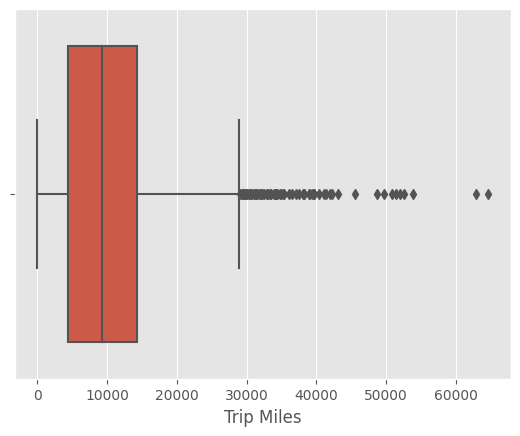

Sum of time in Trip by each Taxi
Taxi ID
175a4c9a16e22bfd2fee721e6cdfdc85dfde21cccb1fdcf514631f3719704bad1c82db8ff3320b8e305e11116bc8932a220910da15c991926772cca793bafd5c    13706601.0
c51a860a4716b6a9e4529f8270d895478e79b5369d3fc254fc657536794c8a75dcfe83a8c2c229da7aa26688ee6e949fc9d5e4461d6deb768021a63e99158432    13241698.0
5eac444af144fca7873ee6adb92594ba02d1fb64a516fdb007745369b1370c7fada0c0025eed87a3d148be51f6a38d7b9a01839600f2956770eb87c27b0a4d37     8869090.0
feb9a71dcd524378d243372a5a61e3d50553304b130979ea11a390af94d518ad5c2c7b53725b10a2e63f32421d44b3f26feee937f65716e1b7dd3d8ff6383522     8669802.0
e6a9b95839d258d36f7d4040e681ddbc5e1ccfa604c36112bb8a44bd84d8518c20b6d3b01d760ba3edbc95bf4a608f1f7f9ed02eae91c905740720718a47e046     8589985.0
Name: Trip Seconds, dtype: float64


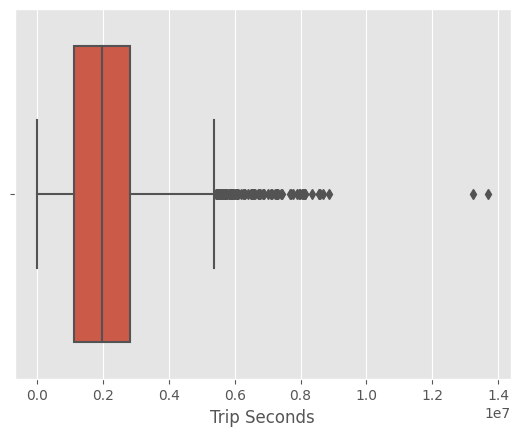

Income from Fare by each Taxi
Taxi ID
0fd63dbf2686f6fba4a3fcb77e2c5715bddb2a197493e17cf9d2667a71567625295b41d5553d75cf6cacdc81951d95dfcad84e414210f2e166ea07cca4197b3a    1579401.87
da60c0b2a94e4c516b9c9bdaceeb3f17066f98190eb3895010b6071915a64752e5cb1532dc6d36f992a6ed48287e4409110651d140ba63296c1f68f0ed853676     176933.90
a79d72d3d49bed13558577cc0608caf7e8da5b9cee67b608b53567d1be89e0ad257654a59e271e1a0239e5ef4a926668d7edb9e1a798a7b1e6726b64113518c6     172768.11
356744753023949fa63be6a6d7e0aef31f2d50dd3b0258449c6b8b6d277765da6955b1ef88c72ca79a9db0d3c20b162fce7cd9ec113b49da61c12c2c546915d4     172613.06
12bfcfb8715a63cacb9a4bc127f622071bab27b36a8488cbeccd3b5698b3f8ea9292662b3468f8d4668f1b84f5a96d8fd4436522abad8b8994c7ad40309a1805     153087.14
Name: Fare, dtype: float64


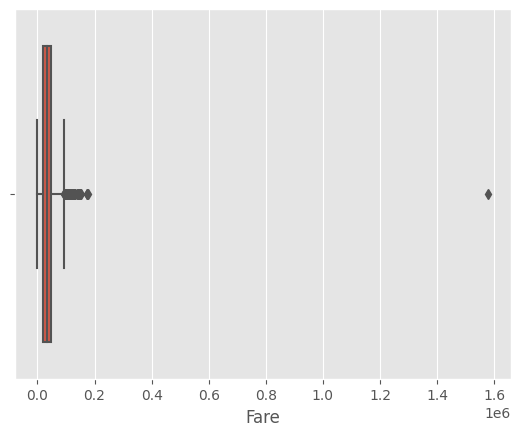

Income from Tips by each Taxi
Taxi ID
847cf962bd6f62040673e6c24c24940aeb2d7fdaa54677eed6a0aaa4aeef61984916b32d763b4baa6c32476531543bb77e2346cd64f505618f6b9d562243f950    31637.89
252ada1a45e512d3d038a61eb1832c0eec8e3c8dce58336f73d774bea49e0f203635dbc583d2135f060a5cd63c9ea7f6ac787f546ffa0b80daabd6e39eebe4f1    19778.34
f98ae5e71fdda8806710af321dce58002146886c013f411be2cd336e0c224e78ed85626eeee462f0d1f5e6b29a030514b95f7b1b8ca59888a10b52dfe55ddf99    16947.36
2780ead18beaa862cc67315ddabd9d1acaadcd6da82eba38b064d7d6f4acc260b68ef1ae3ce06dad845178107940b3493fa99640f0f70c25d15cf57336ab7b8f    16706.59
0cf1289b8acf557ac9673f1b9a4b544f295d83edb49af8429a57b45e0600bcfe523c7b2e8378b5b9a41550ee97cb33bc0b99ec7a73869f6e892e551bc4c2678e    16096.93
Name: Tips, dtype: float64


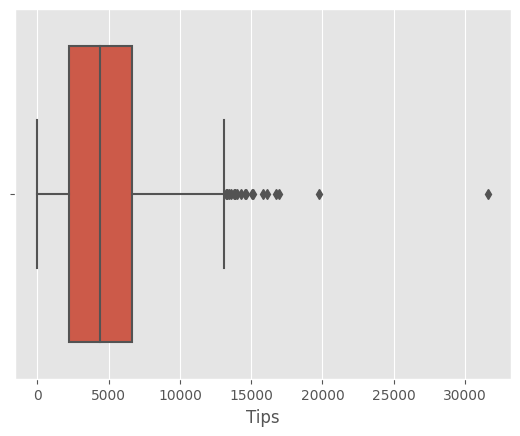

Income from Tolls by each Taxi
Taxi ID
53de0dbfc9e66a4ae663f3383fbbf41032653d04aa87007a3583585c3e79258d87ffb7cb342586f73aa690d69f51ad88ef29a3370b6d681ed78b5a20726d9ded    46662.20
46c4778c3a32454511f96752c509c608955e293da45dbf245bf9eba5bef28916b7b61295d27aa8f61e4ad63b264051057ace630bce41b8aff5bc6853585fed15     6667.98
43df1f84886471551da759b428112545e906f7652ee5b3426c1059a390ab1bc9f47c3de0dc58108b37143c1cef8148b4f44a3df57e17bd140e464df3fbab7482     5786.76
fbfc2ff558d0fc2dd96362ef65d25e08f00b13bc427645692cc034fb62d0ccf5f19c7187554fdf79c714323023b793de64da10de48051c38528f05ca5fc29e27     5558.47
3577d72a8bf30406c1346a5e178b7f3a0ce8e1f966f59afa6b9acfd4668b779e82f3766dd3b426278a666a18a9ae5d159070e7821e06c0c00ed390eca863e001     4444.44
Name: Tolls, dtype: float64


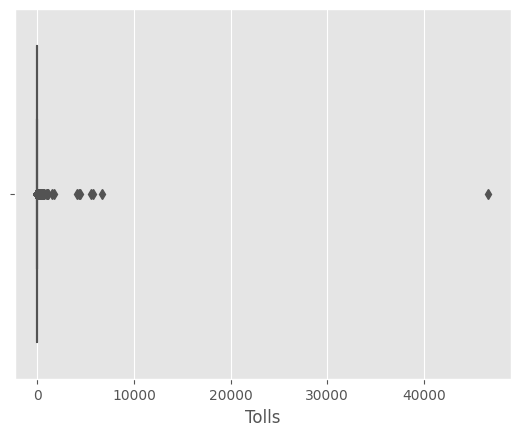

Income from Extras by each Taxi
Taxi ID
53de0dbfc9e66a4ae663f3383fbbf41032653d04aa87007a3583585c3e79258d87ffb7cb342586f73aa690d69f51ad88ef29a3370b6d681ed78b5a20726d9ded    233719.93
fea1ad3b44e1a049eb5b1f33d9c53ddd6cae02b095b6a16c8507d94624aab8dcfcaa2eb03f45242370f1dc88ce1f9fed5fff858de8ef863a30868f68a0626773     27946.04
fdc3156afe8accb70f5aea5f2cd2d7cefd089d13b6d930151e1a195fbb53b1caf1b110ebbb901077e295080c2a5a3e1b2d2b42595435d1defd965e1604c1cf90     25452.47
4364d99b1f14eb6e63596a20a1a936c805239d09b4675e8165d9d0ab91ea565990be35225384dfb78f1bc75c4fd0ba36620ddf840f64f0403df3d2cc55c1258b     17983.45
81bc2020b8536280419b3e152ad07a0c5b9f53cbb503a0e4e2b49254d4e359759e76256dab04c95c0ed69ddb5a89ce1f45d8db67bd7fbb101f91417b4ce3d271     17389.60
Name: Extras, dtype: float64


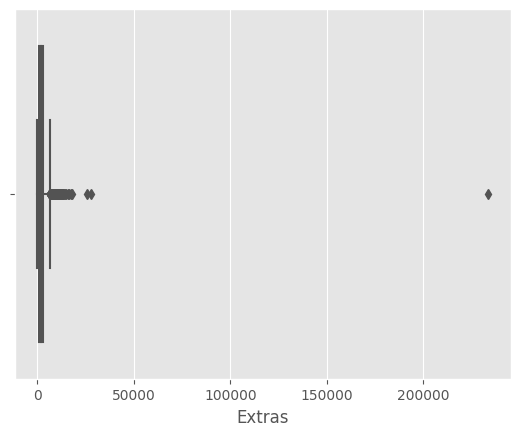

Income from Trip Total by each Taxi
Taxi ID
0fd63dbf2686f6fba4a3fcb77e2c5715bddb2a197493e17cf9d2667a71567625295b41d5553d75cf6cacdc81951d95dfcad84e414210f2e166ea07cca4197b3a    1596126.96
53de0dbfc9e66a4ae663f3383fbbf41032653d04aa87007a3583585c3e79258d87ffb7cb342586f73aa690d69f51ad88ef29a3370b6d681ed78b5a20726d9ded     359988.21
da60c0b2a94e4c516b9c9bdaceeb3f17066f98190eb3895010b6071915a64752e5cb1532dc6d36f992a6ed48287e4409110651d140ba63296c1f68f0ed853676     178863.33
a79d72d3d49bed13558577cc0608caf7e8da5b9cee67b608b53567d1be89e0ad257654a59e271e1a0239e5ef4a926668d7edb9e1a798a7b1e6726b64113518c6     176485.45
356744753023949fa63be6a6d7e0aef31f2d50dd3b0258449c6b8b6d277765da6955b1ef88c72ca79a9db0d3c20b162fce7cd9ec113b49da61c12c2c546915d4     173896.91
Name: Trip Total, dtype: float64


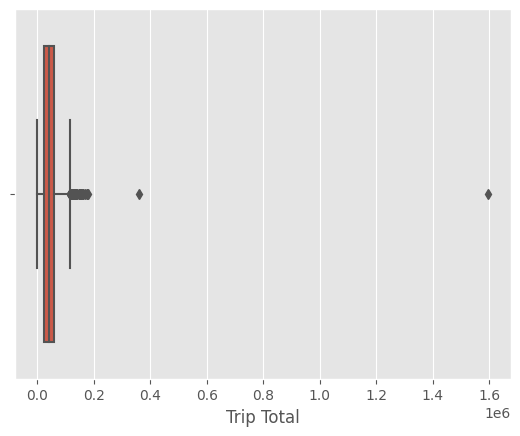

In [34]:
for feat in trip_details_columns:
  #details = df.groupby('Taxi ID')[feat].sum().sort_values(ascending=False).to_pandas()
  details = df.groupby('Taxi ID')[feat].sum().sort_values(ascending=False)
  if feat == 'Trip Miles':
    print('\033[1mMiles made by each Taxi\033[0m')
    print(details.round(2).head())
    sns.boxplot(x=details)
    plt.show()
  elif feat == 'Trip Seconds':
    print('\033[1mSum of time in Trip by each Taxi\033[0m')
    print(details.round(2).head())
    sns.boxplot(x=details)
    plt.show()
  else:
    print(f"\033[1mIncome from {feat} by each Taxi\033[0m")
    print(details.round(2).head())
    sns.boxplot(x=details)
    plt.show()

### 2a. Checking outliers in Fare, Tolls and Extras - TO DO

In [35]:
outliers_fare = df.groupby('Taxi ID')['Fare'].sum().sort_values(ascending=False)
outliers_fare.head(10)

Taxi ID
0fd63dbf2686f6fba4a3fcb77e2c5715bddb2a197493e17cf9d2667a71567625295b41d5553d75cf6cacdc81951d95dfcad84e414210f2e166ea07cca4197b3a    1579401.87
da60c0b2a94e4c516b9c9bdaceeb3f17066f98190eb3895010b6071915a64752e5cb1532dc6d36f992a6ed48287e4409110651d140ba63296c1f68f0ed853676     176933.90
a79d72d3d49bed13558577cc0608caf7e8da5b9cee67b608b53567d1be89e0ad257654a59e271e1a0239e5ef4a926668d7edb9e1a798a7b1e6726b64113518c6     172768.11
356744753023949fa63be6a6d7e0aef31f2d50dd3b0258449c6b8b6d277765da6955b1ef88c72ca79a9db0d3c20b162fce7cd9ec113b49da61c12c2c546915d4     172613.06
12bfcfb8715a63cacb9a4bc127f622071bab27b36a8488cbeccd3b5698b3f8ea9292662b3468f8d4668f1b84f5a96d8fd4436522abad8b8994c7ad40309a1805     153087.14
14685d7c19b1bcf05466194de4a62ee39d4144f97867505373401607acec327e9b715f57d5ae38f00020eb0a6325c0923967d4cdfbefb2ed0930d80a9fcdae42     149836.00
7e25041185a6cc504dd6e2f71691c595aeae45c4b862473f016bed34ee33e1dc9c74ab26454407ae4794086f7f1bd2e91cd5a53c98274f9efbab4e915b0460f7     1

In [36]:
outliers_tolls = df.groupby('Taxi ID')['Tolls'].sum().sort_values(ascending=False)
outliers_tolls.head(10)

Taxi ID
53de0dbfc9e66a4ae663f3383fbbf41032653d04aa87007a3583585c3e79258d87ffb7cb342586f73aa690d69f51ad88ef29a3370b6d681ed78b5a20726d9ded    46662.20
46c4778c3a32454511f96752c509c608955e293da45dbf245bf9eba5bef28916b7b61295d27aa8f61e4ad63b264051057ace630bce41b8aff5bc6853585fed15     6667.98
43df1f84886471551da759b428112545e906f7652ee5b3426c1059a390ab1bc9f47c3de0dc58108b37143c1cef8148b4f44a3df57e17bd140e464df3fbab7482     5786.76
fbfc2ff558d0fc2dd96362ef65d25e08f00b13bc427645692cc034fb62d0ccf5f19c7187554fdf79c714323023b793de64da10de48051c38528f05ca5fc29e27     5558.47
3577d72a8bf30406c1346a5e178b7f3a0ce8e1f966f59afa6b9acfd4668b779e82f3766dd3b426278a666a18a9ae5d159070e7821e06c0c00ed390eca863e001     4444.44
3c3adc53bf9361a6e6a8a08a70ac6303921220efb83a30c7589b0169c2f8bbd4f2e7e8f5f05be624f132ce6bae55577356109350764823f36b42566dd407924c     4344.34
59e1ac971265cac68229ac1e7fb8dacd4aa9d7722df16c2ffc039a515b4acacef28cb04e0edbcdf376faf44862240b2621352159d8a72a887da6f531b016a45a     4143.25
4ddcd

In [37]:
outliers_extras = df.groupby('Taxi ID')['Extras'].sum().sort_values(ascending=False)
outliers_extras.head(10)

Taxi ID
53de0dbfc9e66a4ae663f3383fbbf41032653d04aa87007a3583585c3e79258d87ffb7cb342586f73aa690d69f51ad88ef29a3370b6d681ed78b5a20726d9ded    233719.93
fea1ad3b44e1a049eb5b1f33d9c53ddd6cae02b095b6a16c8507d94624aab8dcfcaa2eb03f45242370f1dc88ce1f9fed5fff858de8ef863a30868f68a0626773     27946.04
fdc3156afe8accb70f5aea5f2cd2d7cefd089d13b6d930151e1a195fbb53b1caf1b110ebbb901077e295080c2a5a3e1b2d2b42595435d1defd965e1604c1cf90     25452.47
4364d99b1f14eb6e63596a20a1a936c805239d09b4675e8165d9d0ab91ea565990be35225384dfb78f1bc75c4fd0ba36620ddf840f64f0403df3d2cc55c1258b     17983.45
81bc2020b8536280419b3e152ad07a0c5b9f53cbb503a0e4e2b49254d4e359759e76256dab04c95c0ed69ddb5a89ce1f45d8db67bd7fbb101f91417b4ce3d271     17389.60
223702c6155649517dcb9f4860ae0fa2669903bbe7d54fae5475cd9677fc8230ad3f1bf9721b88063fb7a3e7b153de9a2e27521d15392ae203f9b17169833607     16233.45
00752524a4118a162dce62ff49c0eb0f79530d9e0ecb5a9b0d23deae98ef2ab2bc84831d2191950da25620e550ad69840e1d02f69d49ab1d9b2b4387e31c2af1     15836.1

#### Let's inspect Top 1 from fare and extras.

In [38]:
#taxi_id_data_a = df[df['Taxi ID'] == '0fd63dbf2686f6fba4a3fcb77e2c5715bddb2a197493e17cf9d2667a71567625295b41d5553d75cf6cacdc81951d95dfcad84e414210f2e166ea07cca4197b3a'].to_pandas()
#taxi_id_data_b = df[df['Taxi ID'] == '53de0dbfc9e66a4ae663f3383fbbf41032653d04aa87007a3583585c3e79258d87ffb7cb342586f73aa690d69f51ad88ef29a3370b6d681ed78b5a20726d9ded'].to_pandas()
taxi_id_data_a = df[df['Taxi ID'] == '0fd63dbf2686f6fba4a3fcb77e2c5715bddb2a197493e17cf9d2667a71567625295b41d5553d75cf6cacdc81951d95dfcad84e414210f2e166ea07cca4197b3a']
taxi_id_data_b = df[df['Taxi ID'] == '53de0dbfc9e66a4ae663f3383fbbf41032653d04aa87007a3583585c3e79258d87ffb7cb342586f73aa690d69f51ad88ef29a3370b6d681ed78b5a20726d9ded']

In [39]:
financial_details_columns = ['Fare', 'Tips', 'Tolls', 'Extras']

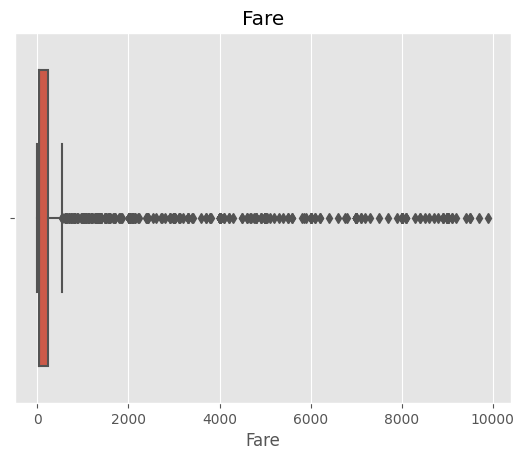

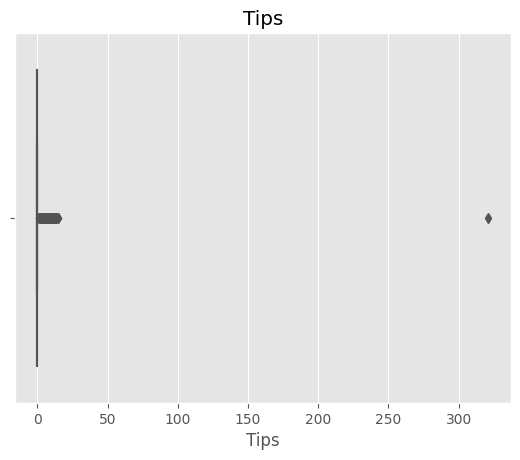

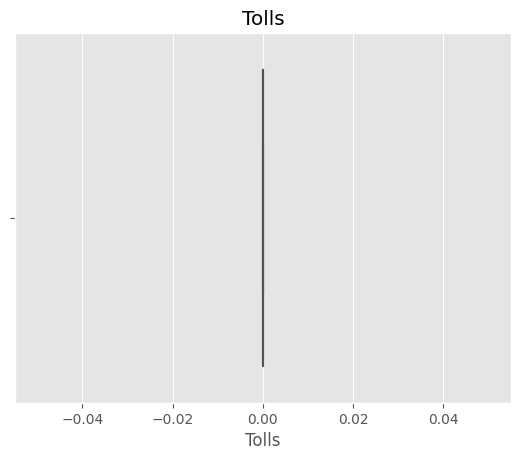

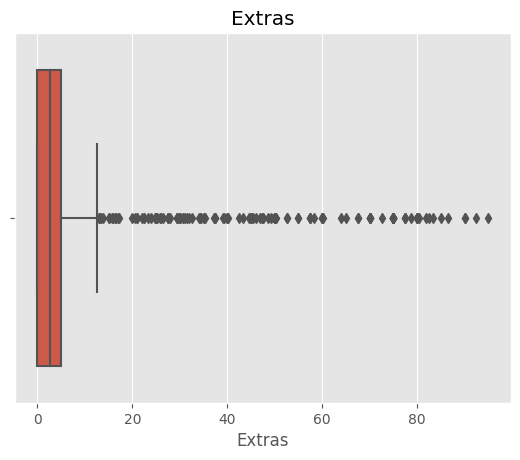

In [40]:
for feat in financial_details_columns:
    sns.boxplot(x=taxi_id_data_a[feat])
    plt.title(feat)
    plt.show()

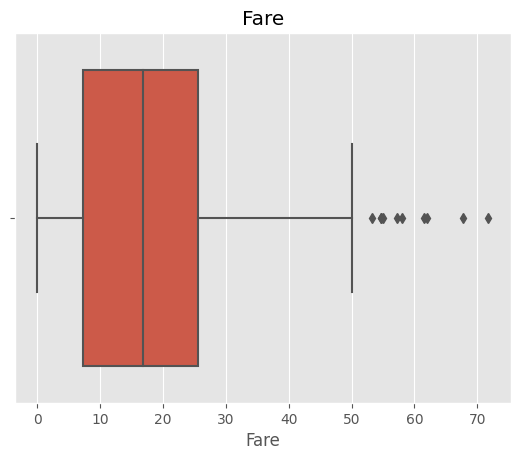

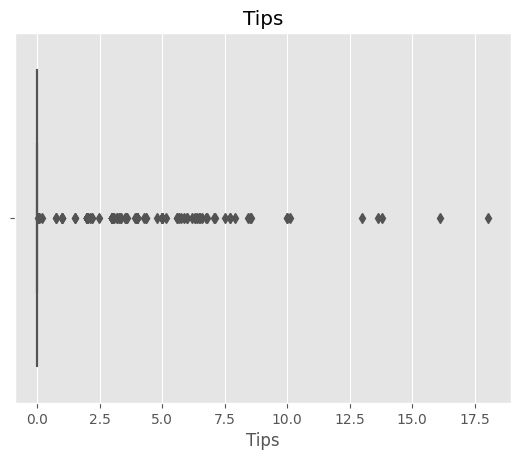

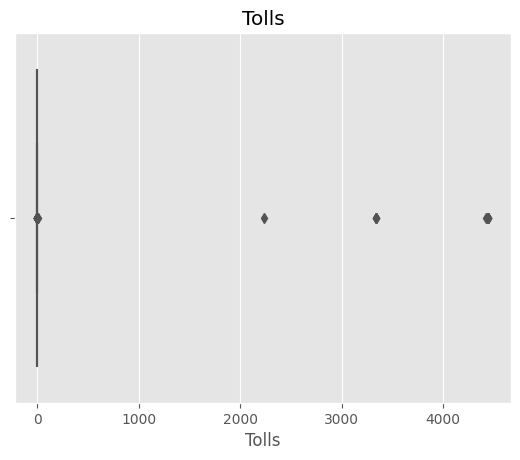

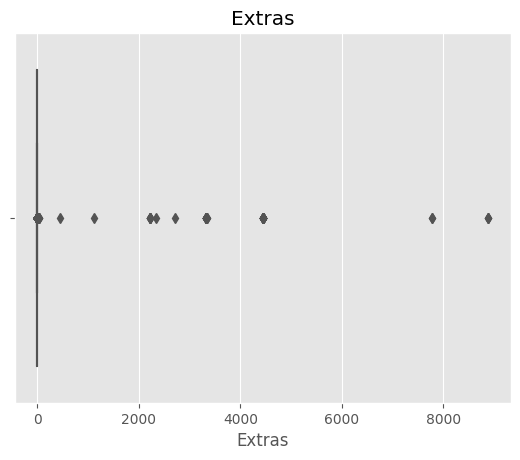

In [41]:
for feat in financial_details_columns:
    sns.boxplot(x=taxi_id_data_b[feat])
    plt.title(feat)
    plt.show()

In [42]:
taxi_id_data_a.groupby('Payment Type').size()

Payment Type
Cash           1382
Credit Card     391
Mobile           42
Prcard            2
dtype: int64

In [43]:
cash_id_data_a = taxi_id_data_a[taxi_id_data_a['Payment Type'] == 'Cash']

In [44]:
cash_id_data_a['Trip Total'].sum()

1570731.98

### Because of huge amount of outliers I decided to contact the database owner and ask about it. He told me that all outliers are probably errors.
I do not think that someone is laundering money this way ⛔

I decided to delete outliers from Fare, Tolls, Extras and Trip Total.

In [45]:
df.shape

(5467826, 19)

In [46]:
#df_to_plot = df[financial_details_columns].to_pandas()
df_to_plot = df[financial_details_columns]

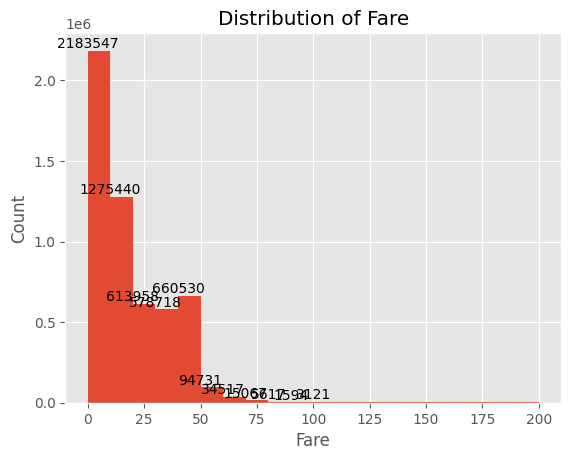

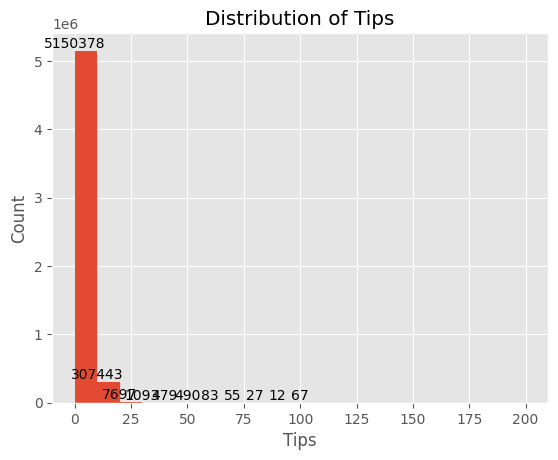

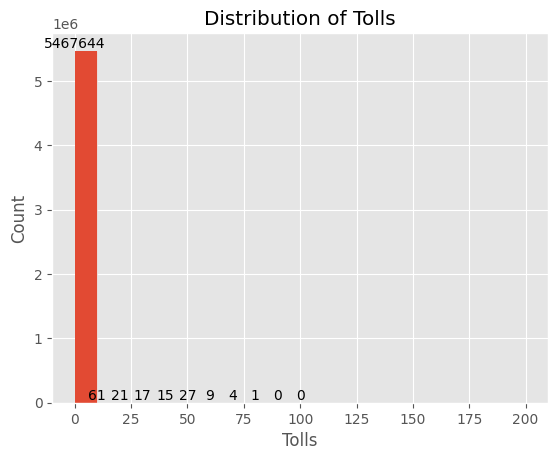

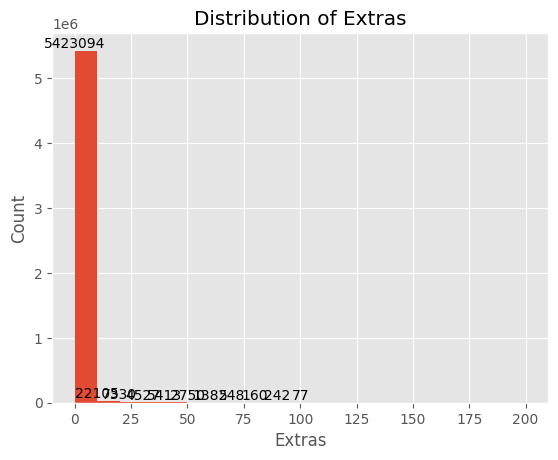

In [47]:
custom_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]
for column in financial_details_columns:
  sns.histplot(df_to_plot[column], bins=custom_bins)
  counts, bins, _ = plt.hist(df_to_plot[column], bins=custom_bins)
  for i, count in enumerate(counts):
    plt.text(bins[i], count, str(int(count)), ha='center', va='bottom')
  plt.title(f'Distribution of {column}')
  plt.show()

In [48]:
df = df[~(df[financial_details_columns] > 100).any(axis=1)]

In [49]:
#df_to_plot = df[financial_details_columns].to_pandas()
df_to_plot = df[financial_details_columns]

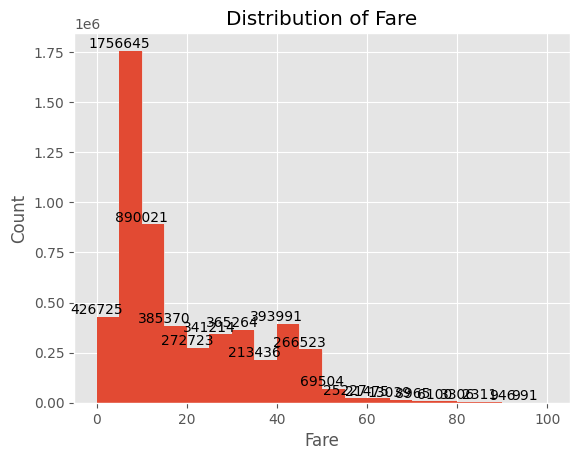

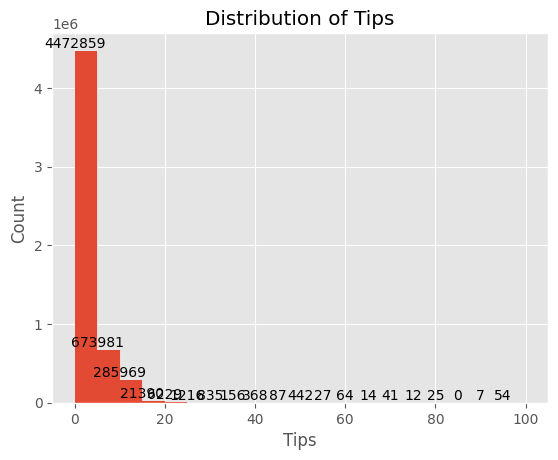

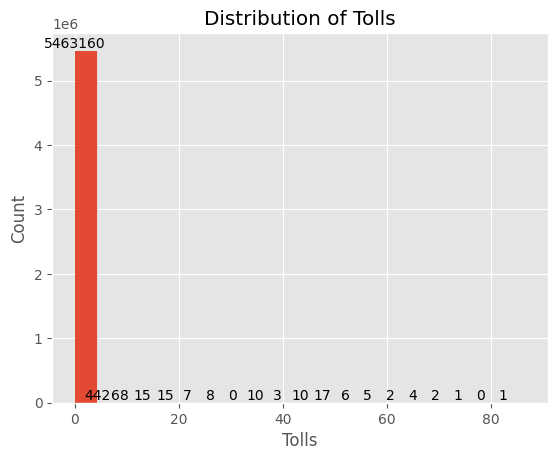

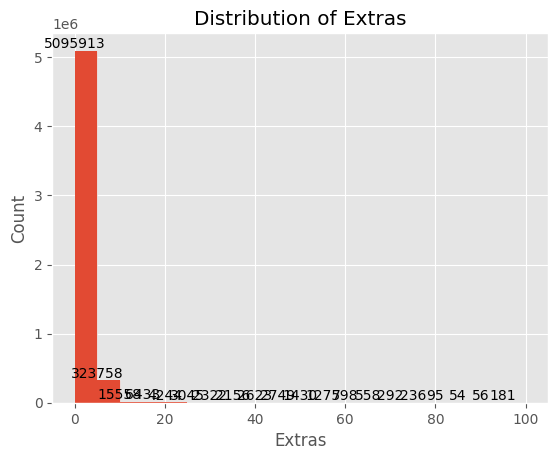

In [50]:
for column in financial_details_columns:
  sns.histplot(df_to_plot[column], bins=20)
  counts, bins, _ = plt.hist(df_to_plot[column], bins=20)
  for i, count in enumerate(counts):
    plt.text(bins[i], count, str(int(count)), ha='center', va='bottom')
  plt.title(f'Distribution of {column}')
  plt.show()

In [51]:
df.shape

(5463776, 19)

### 3. Other info

###3a. What is the most popular payment method?

In [52]:
df.groupby(df['Payment Type'].str.strip("'"), )['Trip ID'].nunique().sort_values(ascending=False)

Payment Type
Credit Card    1991226
Cash           1750169
Mobile          883588
Prcard          544054
Unknown         290828
Dispute           2090
No Charge         1820
Prepaid              1
Name: Trip ID, dtype: int64

###4. Correlations

In [53]:
df.columns

Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Dropoff Centroid Latitude',
       'Dropoff Centroid Longitude'],
      dtype='object')

In [54]:
cols = ['Trip Miles', 'Trip Seconds', 'Fare', 'Tips', 'Tolls', 'Extras', 'Trip Total', 'Pickup Community Area', 'Dropoff Community Area']
#df_to_plot = df[cols].to_pandas()

<Axes: >

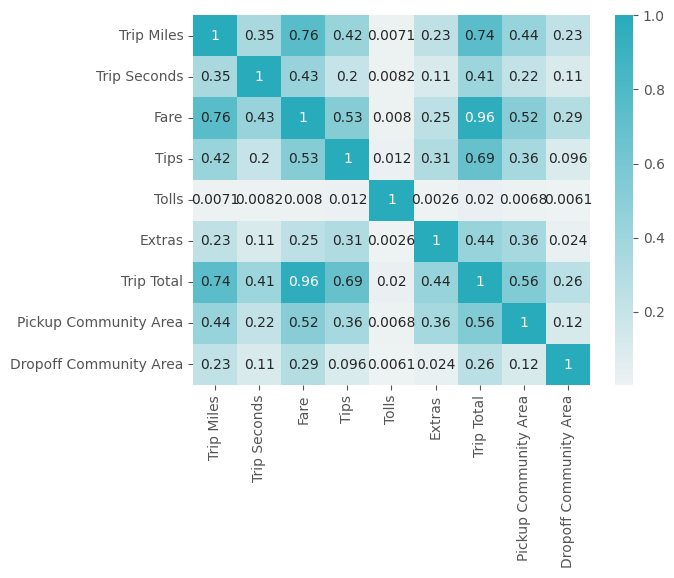

In [55]:
sns.heatmap(df[cols].corr(), annot=True, cmap=sns.light_palette('#28ABBB', as_cmap=True))

**Observations**

TO DO

### 5. Geospacial Analysis

In [56]:
file_path2 = '/content/drive/MyDrive/Taxi/Chicago Community Areas.csv'
areas_names = pd.read_csv(file_path2)

In [57]:
areas_names.head()

,No.,Name
0,1,Rogers Park
1,2,West Ridge
2,3,Uptown
3,4,Lincoln Square
4,5,North Center


In [58]:
import folium
from folium import plugins

In [59]:
Chicago = folium.Map(location=[41.878876, -87.635918],
                    zoom_start = 10,
                    control_scale=True)
zipcodes = "https://data.cityofchicago.org/api/geospatial/gdcf-axmw?method=export&format=GeoJSON"
folium.GeoJson(zipcodes, name="Chicago Zipcodes").add_to(Chicago)
display(Chicago)

In [60]:
pickup_areas = df.groupby('Pickup Community Area')['Taxi ID'].nunique().sort_values(ascending=False)

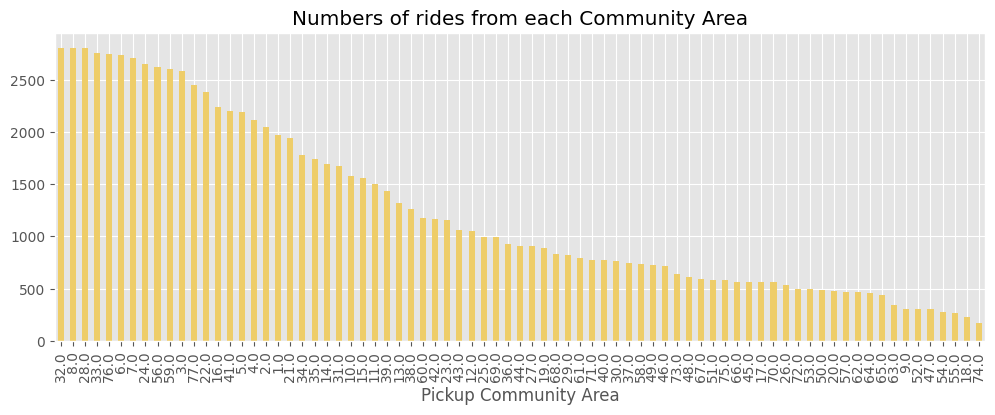

In [61]:
pickup_areas.plot(kind='bar', figsize=(12,4), title='Numbers of rides from each Community Area', color=palette[1])
plt.show()

In [71]:
pickup_latitude    = df['Pickup Centroid Latitude']
pickup_longitude   = df['Pickup Centroid Longitude']
pickupheatmap = folium.Map(location=[41.878876,-87.635918],
                     zoom_start = 10)
folium.plugins.HeatMap(list(zip(pickup_latitude,
                                pickup_longitude)),
                       min_opacity = 500,
                       radius=30,
                       blur=20).add_to(pickupheatmap)
plugins.Fullscreen(position='topright').add_to(pickupheatmap)

In [ ]:
pickupheatmap.save("pickup_heatmap.html")

In [65]:
dropoff_areas = df.groupby('Dropoff Community Area')['Taxi ID'].nunique().sort_values(ascending=False)

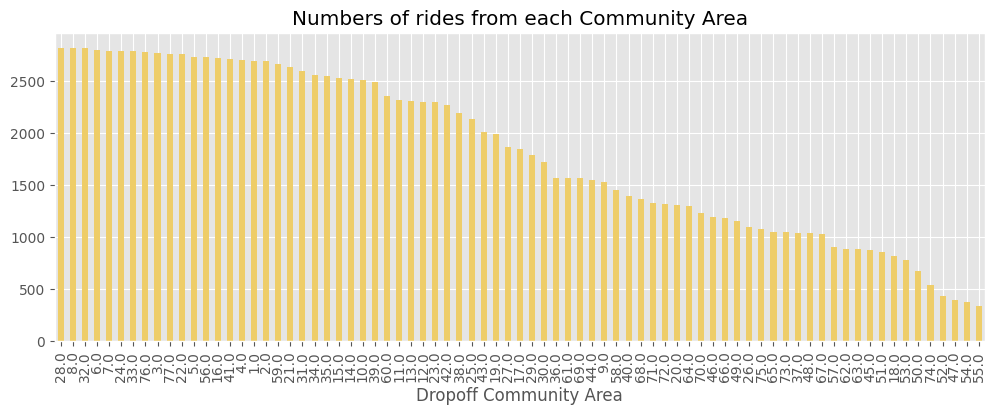

In [66]:
dropoff_areas.plot(kind='bar', figsize=(12,4), title='Numbers of rides from each Community Area', color=palette[1])
plt.show()